In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, f1_score, log_loss, precision_score, classification_report, confusion_matrix
import warnings
from statistics import mode, mean, median
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')

C:\Users\srbol\AppData\Local\Temp\ipykernel_22752\1465643168.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
class dataImporting:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None
        self.output_df = None
        self.input_df = None
    
    def loadData(self) :
        self.data = pd.read_csv(self.file_path, delimiter = ';')

    def valueCounts(self, target_column):
        return self.data[target_column].value_counts()
    
    def inputOutput(self, target_column):
        self.input_df = self.data.drop(columns = target_column)
        self.output_df = self.data[target_column]
    
    def outlierCheck(self, target_column):
        boxplot = self.data.boxplot(column = [target_column])
        plt.show()

    def naCheck(self, target_column):
        print(self.data[target_column].isna().sum())

In [3]:
from sklearn.preprocessing import LabelEncoder

class preprocess:
    
    def __init__(self, input_df, output_df):
        self.output_df = output_df
        self.input_df = input_df
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.fill_value = None

    def split(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.input_df, self.output_df, random_state=42, test_size=0.2)
        print('X_train :', self.X_train.shape)    
        print('X_test :', self.X_test.shape)    
        print('y_train :', self.y_train.shape)    
        print('y_test :', self.y_test.shape)     

    def labelEncoder(self, target_column):
        self.X_train[target_column] = LabelEncoder().fit_transform(self.X_train[target_column])
        self.X_test[target_column] = LabelEncoder().fit_transform(self.X_test[target_column])

    def replaceNA(self, target_column, method):
        if method == 'mean' :
            fill_value = self.X_train[target_column].mean()
        elif method == 'median' :
            fill_value = np.nanmedian(self.X_train[target_column])
        elif method == 'mode' :
            fill_value = self.X_train(self.X_train[target_column]).mode()[0]
        else:
            return None

        self.X_train[target_column].fillna(fill_value, inplace = True)
        self.X_test[target_column].fillna(fill_value, inplace = True)

    


In [4]:
class FeatureEncoding:

    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train =  X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def Encoding(self, target_column):
        self.X_train = pd.get_dummies(self.X_train, columns = [target_column])
        self.X_test = pd.get_dummies(self.X_test, columns = [target_column])

    def replacingCategorical(self, encoded, encodeTest):
        self.X_train.replace(encoded, inplace = True)
        self.X_test.replace(encodeTest, inplace = True)

In [5]:
class Model:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.model = None
        self.y_pred = None
    
    def evaluation(self):
        y_pred = self.model.predict(self.X_test)
        print("\nClassification Report\n")
        print(classification_report(self.y_test, y_pred, target_names=['A', 'B', 'C', 'D']))
        
    def DecisionTree(self):
        self.model = DecisionTreeClassifier()
        self.model.fit(self.X_train, self.y_train)
        self.y_pred = self.model.predict(self.X_test)
    
    def report(self):
        print(classification_report(self.y_test, self.y_pred, target_names=['A', 'B', 'C','D']))


----------------------------------------------

Data load & overview

In [6]:
#Data reading
dataLoad = dataImporting('user_segmentation.csv')
dataLoad.loadData()

#Defining input and output
dataLoad.inputOutput('Segmentation')

X = dataLoad.input_df
y = dataLoad.output_df

#Testing data berhasil dibaca atau tidak
X


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0
...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0


In [7]:
dataLoad.valueCounts('Graduated')

Graduated
Yes    4968
No     3022
Name: count, dtype: int64

In [8]:
dataLoad.valueCounts('Spending_Score')

Spending_Score
Low        4878
Average    1974
High       1216
Name: count, dtype: int64

In [9]:
dataLoad.valueCounts('Ever_Married')

Ever_Married
Yes    4643
No     3285
Name: count, dtype: int64

In [10]:
dataLoad.naCheck('Work_Experience')

829


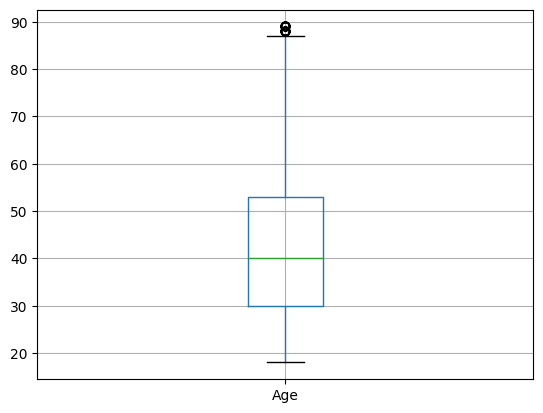

In [11]:
dataLoad.outlierCheck('Age')

Data split and missing values

In [12]:
#Data split 
PreProcess = preprocess(X,y)

PreProcess.split()
PreProcess.labelEncoder('Gender')
PreProcess.labelEncoder('Ever_Married')
PreProcess.labelEncoder('Graduated')
PreProcess.labelEncoder('Spending_Score')
PreProcess.labelEncoder('Profession')

print(PreProcess.X_train.info())

X_train : (6454, 9)
X_test : (1614, 9)
y_train : (6454,)
y_test : (1614,)
<class 'pandas.core.frame.DataFrame'>
Index: 6454 entries, 2821 to 7270
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6454 non-null   int64  
 1   Gender           6454 non-null   int32  
 2   Ever_Married     6454 non-null   int32  
 3   Age              6454 non-null   int64  
 4   Graduated        6454 non-null   int32  
 5   Profession       6454 non-null   int32  
 6   Work_Experience  5795 non-null   float64
 7   Spending_Score   6454 non-null   int32  
 8   Family_Size      6194 non-null   float64
dtypes: float64(2), int32(5), int64(2)
memory usage: 378.2 KB
None


In [13]:
PreProcess.replaceNA(target_column='Ever_Married', method = 'mean')
PreProcess.replaceNA(target_column='Graduated', method = 'median')
PreProcess.replaceNA(target_column='Work_Experience', method = 'mean')
PreProcess.replaceNA(target_column='Profession', method = 'mean')
PreProcess.replaceNA(target_column='Family_Size', method = 'median')

X_train = PreProcess.X_train
X_test = PreProcess.X_test
y_train = PreProcess.y_train
y_test = PreProcess.y_test

X_train.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

In [15]:
model = Model(X_train, X_test, y_train, y_test)
model.DecisionTree()
model.evaluation()


Classification Report

              precision    recall  f1-score   support

           A       0.33      0.30      0.32       391
           B       0.33      0.34      0.34       369
           C       0.44      0.47      0.45       380
           D       0.60      0.59      0.59       474

    accuracy                           0.44      1614
   macro avg       0.42      0.43      0.43      1614
weighted avg       0.43      0.44      0.44      1614

